### Analysis of the cleaned data
- The goal of this project is to gain meaningful insight from the dataset and some of the guiding questions I will use include: 
    1. At what companies do developers get paid the most?
    2. How much does remote working matterto employees?
    3. How does coding experience affect the level of pay?
    4. What's the most popular method of learning how to code?
    5. Are you most likely to get a job as a dev if you have a master's degree? 

1. Importing libraries

In [32]:
import pandas as pd 
pd.set_option("display.max_columns",200)
pd.set_option('display.float_format','{:.2f}'.format)
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import re
import sklearn as sk


2. Loading the dataset

In [33]:
clean_df = pd.read_csv("dataset/clean_SO_survey.csv")
clean_df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,WorkExp,Industry,YearlyCompensation,SOAccount,Learning Method,Certifications_Learnt
0,25-34,Employed,Remote,Bachelors,18.00,9.00,Senior Exec,United States of America,10,Tech,285000,Yes,Books,Other
1,25-34,Employed,Remote,Bachelors,6.00,4.00,Full-Stack Dev,Philippines,6,Other,23456,No,Books,Other
2,35-44,Employed,Remote,University No-degree,21.00,21.00,Back-End Dev,United Kingdom of Great Britain and Northern I...,22,Other,96828,Yes,Books,Other
3,35-44,Employed,Remote,University No-degree,4.00,3.00,Full-Stack Dev,United States of America,4,Tech,135000,Yes,Friends/Family,Udemy
4,25-34,Employed,Remote,Bachelors,5.00,3.00,Full-Stack Dev,United States of America,5,Finance,80000,Yes,Books,Codecademy


In [34]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31772 entries, 0 to 31771
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    31772 non-null  object 
 1   Employment             31772 non-null  object 
 2   RemoteWork             31772 non-null  object 
 3   EdLevel                31772 non-null  object 
 4   YearsCode              31772 non-null  float64
 5   YearsCodePro           31772 non-null  float64
 6   DevType                31772 non-null  object 
 7   Country                31772 non-null  object 
 8   WorkExp                31772 non-null  int64  
 9   Industry               31772 non-null  object 
 10  YearlyCompensation     31772 non-null  int64  
 11  SOAccount              31772 non-null  object 
 12  Learning Method        31772 non-null  object 
 13  Certifications_Learnt  31772 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 3.4+

In [35]:
clean_df.describe()

,YearsCode,YearsCodePro,WorkExp,YearlyCompensation
count,31772.00,31772.00,31772.00,31772.00
mean,13.65,10.08,10.51,83949.36
std,9.66,7.99,6.98,143907.23
min,0.00,0.00,0.00,1.00
25%,6.00,4.00,6.00,53379.00
50%,11.00,9.00,10.00,83942.00
75%,19.00,13.00,10.00,83942.00
max,51.00,51.00,50.00,17612921.00


In [36]:
clean_df.columns

Index(['Age', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode',
       'YearsCodePro', 'DevType', 'Country', 'WorkExp', 'Industry',
       'YearlyCompensation', 'SOAccount', 'Learning Method',
       'Certifications_Learnt'],
      dtype='object')

In [37]:
numeric_cols = clean_df[["YearsCode","YearsCodePro","WorkExp","YearlyCompensation"]]
numeric_cols

,YearsCode,YearsCodePro,WorkExp,YearlyCompensation
0,18.00,9.00,10,285000
1,6.00,4.00,6,23456
2,21.00,21.00,22,96828
3,4.00,3.00,4,135000
4,5.00,3.00,5,80000
...,...,...,...,...
31767,10.00,8.00,8,83942
31768,25.00,22.00,22,83942
31769,20.00,5.00,10,83942
31770,3.00,10.08,10,83942


<Axes: >

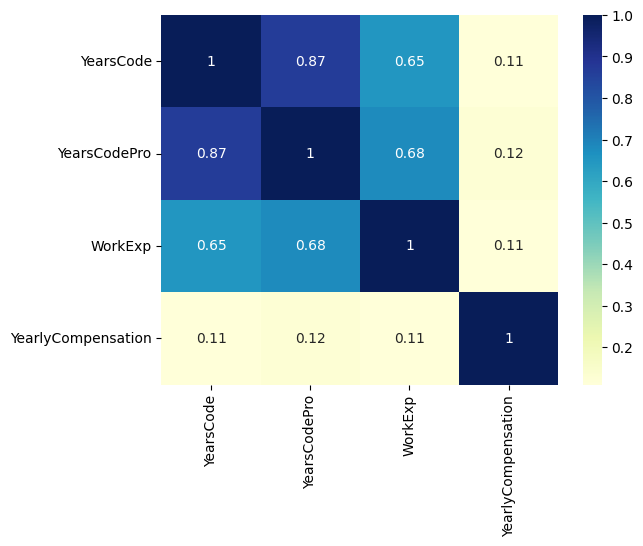

In [38]:
sns.heatmap(numeric_cols.corr(), annot=True,cmap="YlGnBu")

Univariate Analysis

In [39]:
clean_df.columns

Index(['Age', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode',
       'YearsCodePro', 'DevType', 'Country', 'WorkExp', 'Industry',
       'YearlyCompensation', 'SOAccount', 'Learning Method',
       'Certifications_Learnt'],
      dtype='object')

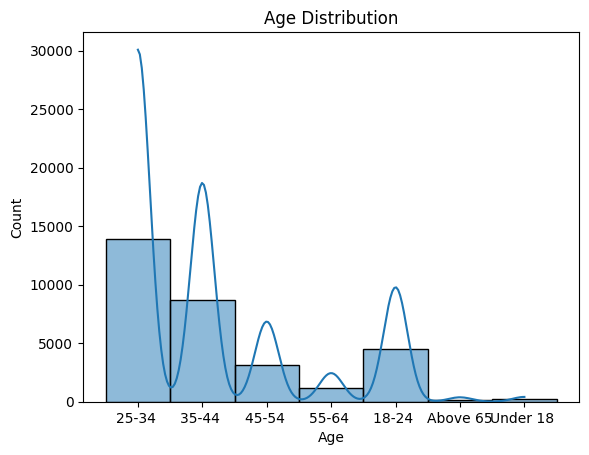

In [40]:
# Age distribution

ax = sns.histplot(data=clean_df,x="Age", kde=True, bins=35)
ax.set_title("Age Distribution")
plt.show()

In [41]:
clean_df["EdLevel"].value_counts()

EdLevel
Bachelors               14950
Masters                  8431
University No-degree     3959
Secondary school         1554
Professional degree      1213
Associate degree         1101
Other                     386
Primary school            178
Name: count, dtype: int64

<Axes: xlabel='YearsCode', ylabel='WorkExp'>

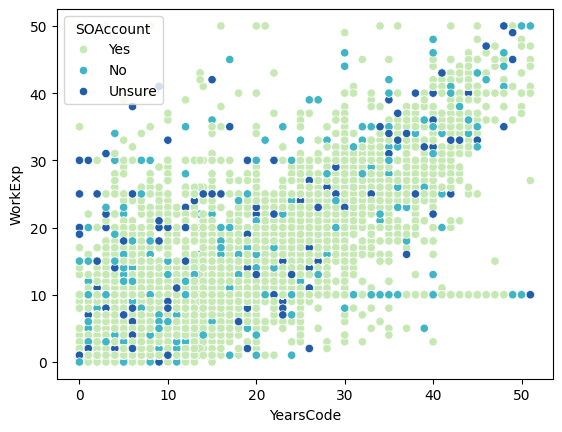

In [42]:
sns.scatterplot(x=clean_df["YearsCode"],
                y=clean_df["WorkExp"],
                hue=clean_df["SOAccount"],
                palette="YlGnBu")

1. At what companies do developers get paid the most?

In [43]:
clean_df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,WorkExp,Industry,YearlyCompensation,SOAccount,Learning Method,Certifications_Learnt
0,25-34,Employed,Remote,Bachelors,18.00,9.00,Senior Exec,United States of America,10,Tech,285000,Yes,Books,Other
1,25-34,Employed,Remote,Bachelors,6.00,4.00,Full-Stack Dev,Philippines,6,Other,23456,No,Books,Other
2,35-44,Employed,Remote,University No-degree,21.00,21.00,Back-End Dev,United Kingdom of Great Britain and Northern I...,22,Other,96828,Yes,Books,Other
3,35-44,Employed,Remote,University No-degree,4.00,3.00,Full-Stack Dev,United States of America,4,Tech,135000,Yes,Friends/Family,Udemy
4,25-34,Employed,Remote,Bachelors,5.00,3.00,Full-Stack Dev,United States of America,5,Finance,80000,Yes,Books,Codecademy


In [44]:
clean_df.Industry.value_counts()

Industry
Tech             23242
Finance           2189
Other             1636
Manufacturing     1118
Healthcare        1053
Retail             971
Education          504
Insurance          370
Advertising        365
Oil & Gas          139
Legal              105
Wholesale           80
Name: count, dtype: int64

In [45]:
clean_df.YearlyCompensation.value_counts().head(6)

YearlyCompensation
83942     11068
64254       314
53545       252
85672       221
150000      220
74963       218
Name: count, dtype: int64

In [46]:
mean_compensation_by_industry = clean_df.groupby('Industry')['YearlyCompensation'].mean()
top_10_industries = mean_compensation_by_industry.sort_values(ascending=True).head(10)
top_10_industries


Industry
Wholesale       66642.54
Education       71889.55
Manufacturing   78640.56
Legal           80576.01
Tech            82893.92
Insurance       84396.10
Oil & Gas       87543.01
Finance         87815.18
Retail          89453.50
Healthcare      90968.71
Name: YearlyCompensation, dtype: float64

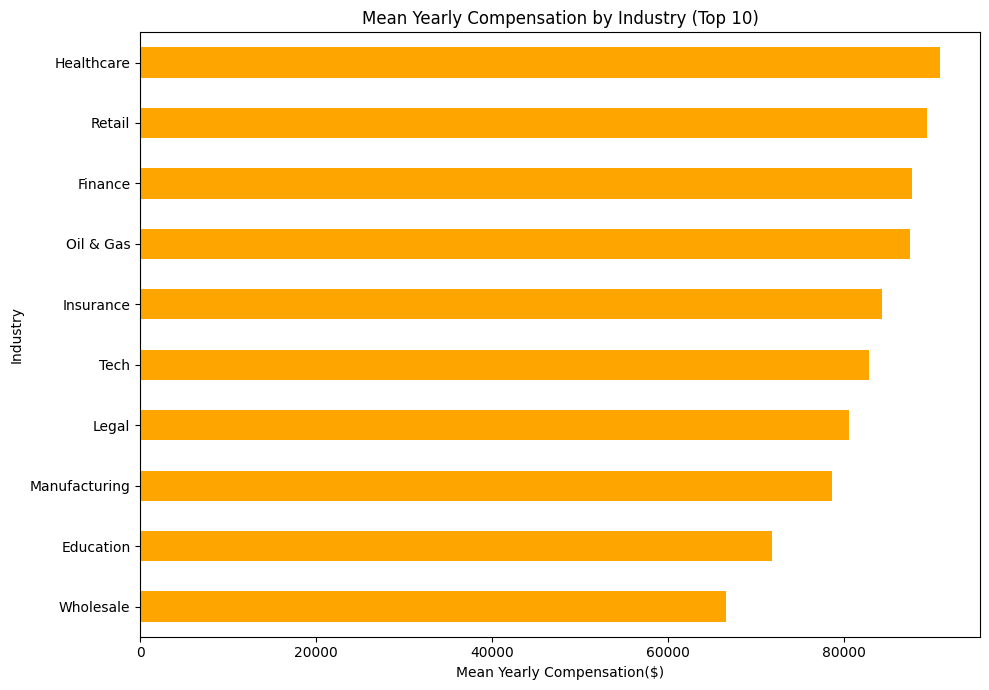

In [47]:
plt.figure(figsize=(10,7))
top_10_industries.plot.barh(color='orange')
plt.title("Mean Yearly Compensation by Industry (Top 10)")
plt.ylabel("Industry")
plt.xlabel("Mean Yearly Compensation($)")
plt.tight_layout()
plt.show()



In [62]:
from matplotlib.ticker import NullFormatter
def formatter(x, pos):
    return str(round(x / 1e6, 1))

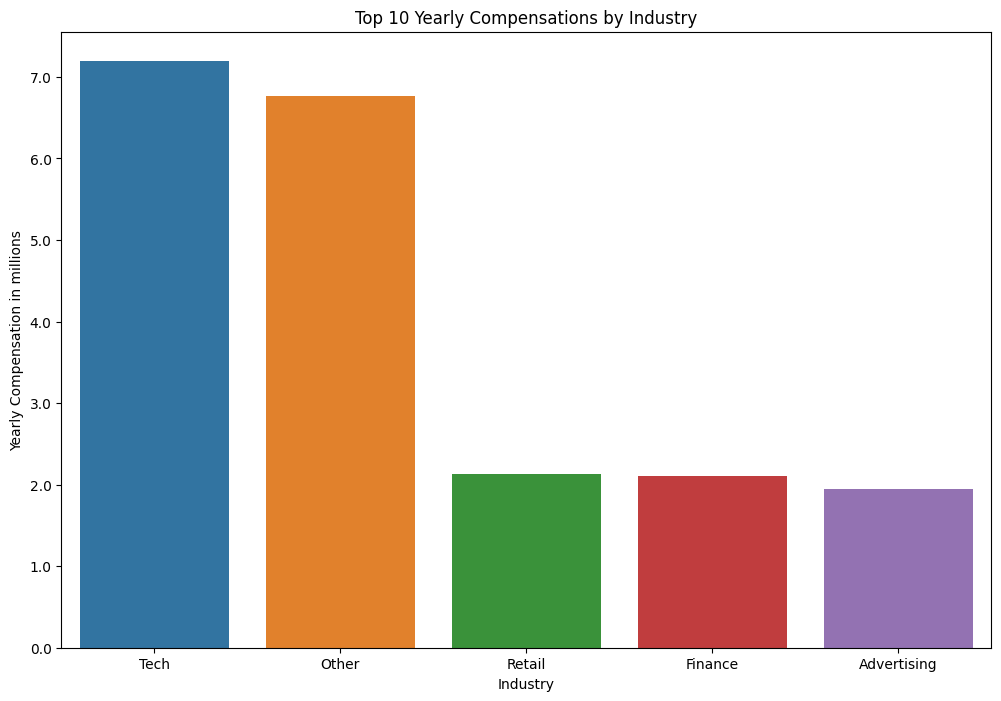

In [48]:

top_compensations = clean_df.sort_values(by="YearlyCompensation", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.barplot(y="YearlyCompensation",\
            x="Industry",\
            data=top_compensations,\
            hue="Industry",\
            legend=False,\
            errorbar=None
            )

ax.set_title("Top 10 Yearly Compensations by Industry")
ax.set_xlabel("Industry")
ax.set_ylabel("Yearly Compensation in millions")

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())

plt.show()

2. How much does remote working matter to employees?

In [49]:
clean_df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,WorkExp,Industry,YearlyCompensation,SOAccount,Learning Method,Certifications_Learnt
0,25-34,Employed,Remote,Bachelors,18.00,9.00,Senior Exec,United States of America,10,Tech,285000,Yes,Books,Other
1,25-34,Employed,Remote,Bachelors,6.00,4.00,Full-Stack Dev,Philippines,6,Other,23456,No,Books,Other
2,35-44,Employed,Remote,University No-degree,21.00,21.00,Back-End Dev,United Kingdom of Great Britain and Northern I...,22,Other,96828,Yes,Books,Other
3,35-44,Employed,Remote,University No-degree,4.00,3.00,Full-Stack Dev,United States of America,4,Tech,135000,Yes,Friends/Family,Udemy
4,25-34,Employed,Remote,Bachelors,5.00,3.00,Full-Stack Dev,United States of America,5,Finance,80000,Yes,Books,Codecademy


In [50]:
work_env_count = clean_df["RemoteWork"].value_counts()
work_env_count

RemoteWork
Hybrid       13606
Remote       13314
In-person     4852
Name: count, dtype: int64

In [51]:
clean_df.RemoteWork.unique()

array(['Remote', 'Hybrid', 'In-person'], dtype=object)

Text(0.5, 1.0, 'Distribution of Working Environments')

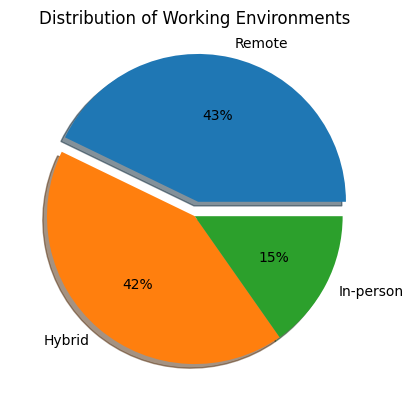

In [52]:
plt.pie(work_env_count, labels=clean_df.RemoteWork.unique(), explode=(0.1,0.0,0.0),autopct='%1.0f%%',shadow=True)
plt.title("Distribution of Working Environments")


Text(0.5, 1.0, 'Distribution of Working Modalities/Arrangements')

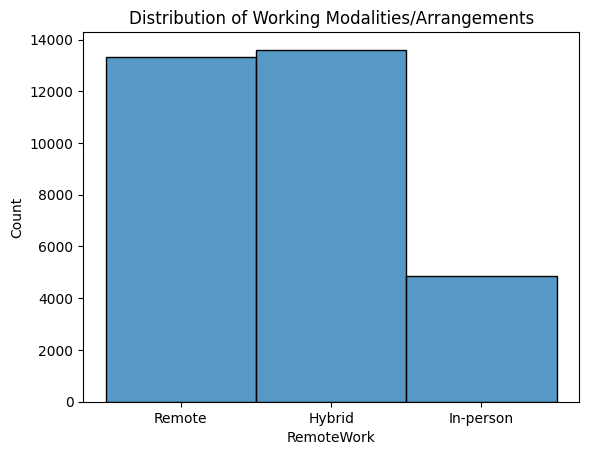

In [53]:
ax = sns.histplot(data=clean_df,\
                  x="RemoteWork",\
                  bins=5)
ax.set_title("Distribution of Working Modalities/Arrangements")

3. How does coding experience affect the level of pay?

In [54]:
clean_df.head(2)

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,WorkExp,Industry,YearlyCompensation,SOAccount,Learning Method,Certifications_Learnt
0,25-34,Employed,Remote,Bachelors,18.00,9.00,Senior Exec,United States of America,10,Tech,285000,Yes,Books,Other
1,25-34,Employed,Remote,Bachelors,6.00,4.00,Full-Stack Dev,Philippines,6,Other,23456,No,Books,Other


In [57]:
clean_df[["YearsCode","YearsCodePro","YearlyCompensation"]].head(10)

,YearsCode,YearsCodePro,YearlyCompensation
0,18.00,9.00,285000
1,6.00,4.00,23456
2,21.00,21.00,96828
3,4.00,3.00,135000
4,5.00,3.00,80000
5,20.00,15.00,64254
6,10.00,9.00,75000
7,5.00,0.00,150000
8,24.00,14.00,75010
9,8.00,6.00,120000


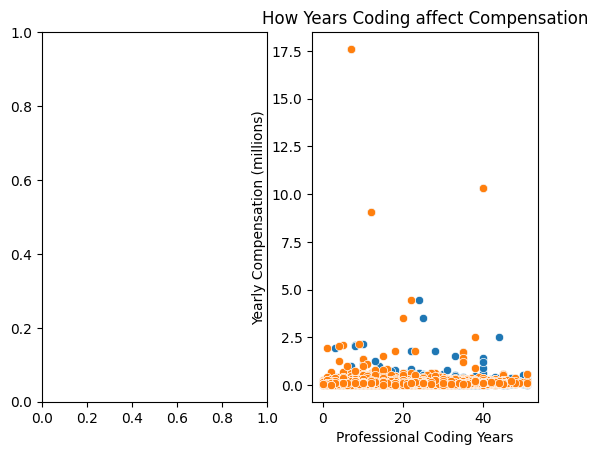

In [70]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1 = sns.scatterplot(data=clean_df,
                     x="YearsCode",
                     y="YearlyCompensation"
                     )

ax1.set_ylabel("Yearly Compensation (millions)")
ax1.set_xlabel("Years Coding")
ax1.set_title("How Years Coding affect Compensation")

ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_minor_formatter(NullFormatter())


ax2 = sns.scatterplot(data=clean_df,
                     x="YearsCodePro",
                     y="YearlyCompensation"
                     )

ax2.set_ylabel("Yearly Compensation (millions)")
ax2.set_xlabel("Professional Coding Years")
ax.set_title("How Years Coding Professionally affect Compensation")

ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_minor_formatter(NullFormatter())




 4. What's the most popular method of learning how to code?

5. Are you most likely to get a job as a dev if you have a master's degree? 